<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra%5CLS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
past_week_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2698]

In [0]:
def mean_of_list(list_of_interest):
  return sum(list_of_interest) / len(list_of_interest)

def sample_variance_of_list(list_of_interest):
  results = []
  m = sum(list_of_interest)/len(list_of_interest)
  for i in range(len(list_of_interest)):
    results.append((list_of_interest[i]-m)**2)
  return sum(results)/(len(results) - 1)

def sample_std_of_list(list_of_interest):
  results = []
  m = sum(list_of_interest)/len(list_of_interest)
  for i in range(len(list_of_interest)):
    results.append((list_of_interest[i]-m)**2)
  return (sum(results)/(len(results) - 1))**(1/2)

In [41]:
print("Past week sales, mean:", mean_of_list(past_week_sales))

print("Past week sales, sample variance:", sample_variance_of_list(past_week_sales))

print("Past week sales, sample standard deviation:", sample_std_of_list(past_week_sales))

Past week sales, mean: 3054.0
Past week sales, sample variance: 213308.33333333334
Past week sales, sample standard deviation: 461.85315126491594


In [0]:
import numpy as np

In [42]:
print("Past week sales, np.mean:", np.mean(past_week_sales))

print("Past week sales, np.var, ddof=1:", np.var(past_week_sales, ddof=1))

print("Past week sales, np.std, ddof=1:", np.std(past_week_sales, ddof=1))

Past week sales, np.mean: 3054.0
Past week sales, np.var, ddof=1: 213308.33333333334
Past week sales, np.std, ddof=1: 461.85315126491594


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers_entering_store = [127, 80, 105, 92, 120, 115, 93]

In [0]:
def sample_covariance_of_two_lists(list_of_interest_a, list_of_interest_b):
  assert len(list_of_interest_a) == len(list_of_interest_b), "Lists must be equal in length"
  results = []
  mean_a = sum(list_of_interest_a)/len(list_of_interest_a)
  mean_b = sum(list_of_interest_b)/len(list_of_interest_b)
  for i in range(len(list_of_interest_a)):
    results.append((list_of_interest_a[i] - mean_a)*(list_of_interest_b[i] - mean_b))
  return sum(results) / (len(results) - 1)


In [50]:
print("Sample covariance calculated manually:",sample_covariance_of_two_lists(past_week_sales, customers_entering_store))

print("Sample covariance calculated with np.cov, ddof=1", np.cov(past_week_sales, customers_entering_store, ddof=1)[0,1])

Sample covariance calculated manually: 7587.000000000001
Sample covariance calculated with np.cov, ddof=1 7587.0


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [53]:
print("Sample standard deviation of customers entering store last week:", sample_std_of_list(customers_entering_store))

Sample standard deviation of customers entering store last week: 17.057326313123664


In [0]:
sstd_customers_entering_store = sample_std_of_list(customers_entering_store)

sstd_past_week_sales = sample_std_of_list(past_week_sales)

scov_customers_sales = sample_covariance_of_two_lists(past_week_sales, customers_entering_store)

In [55]:
correlation_coefficient = scov_customers_sales / (sstd_customers_entering_store * sstd_past_week_sales)

print("Correlation coefficient for customers entering store last week and sales last week:", correlation_coefficient)

Correlation coefficient for customers entering store last week and sales last week: 0.9630641467483851


In [59]:
print("Same correlation coefficient calculated using np.corrcoef:",np.corrcoef(customers_entering_store,past_week_sales)[0,1])

Same correlation coefficient calculated using np.corrcoef: 0.963064146748385


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col=0)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [64]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [65]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

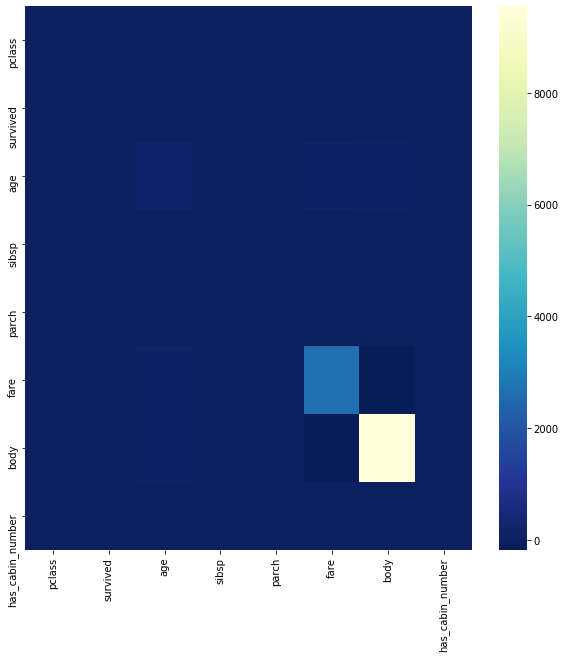

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.cov(), cmap="YlGnBu_r")
plt.show()

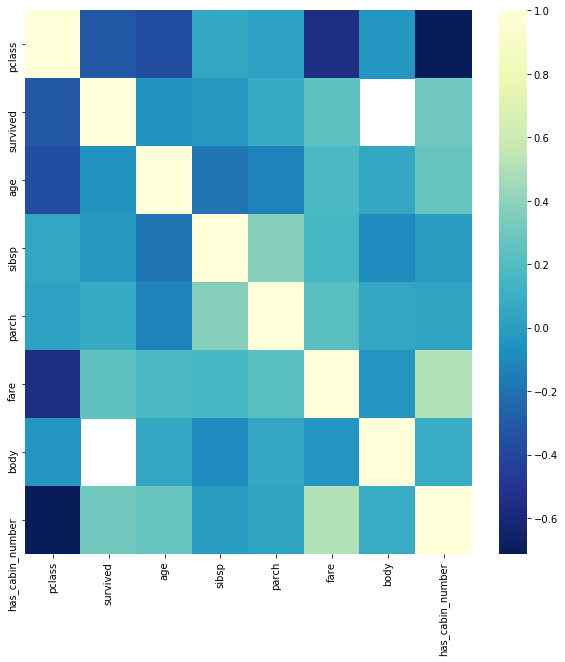

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), cmap="YlGnBu_r")
plt.show()

In [0]:
# Return to encode if time allows

In [157]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [161]:
df.describe(exclude=np.number)

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1310,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,917,39,64


In [171]:
df["sex"].value_counts(dropna=False)

male      843
female    466
NaN         1
Name: sex, dtype: int64

In [172]:
df["sex"] = df["sex"].replace({"male":0, "female":1})

df["sex"].value_counts(dropna=False)

0.0    843
1.0    466
NaN      1
Name: sex, dtype: int64

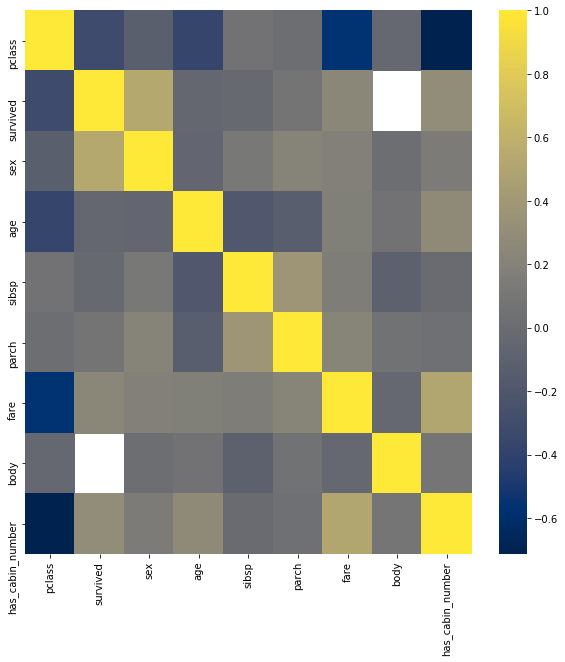

In [182]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), cmap="cividis")
plt.show()

It apears sex is correlated with survival

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

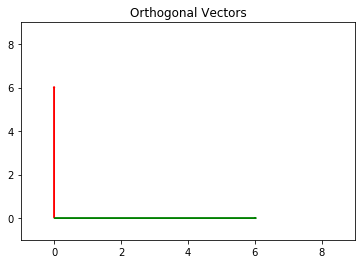

In [82]:
vector_a = [0, 6]
vector_b = [6, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_a[0], vector_a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_b[0], vector_b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,9)          
plt.ylim(-1,9)
plt.title("Orthogonal Vectors")
plt.show()

Perpendicular is a synonym for orthogonal.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Two vectors are orthogonal if their dot product is zero. Let's test is a and b are orthogonal. 

In [83]:
import numpy as np

a = [-5, 3, 7]
b= [6, -8, 2]

np.dot(a,b)


-40

These two vectors are not orthogonal because their dot product is non-zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import numpy.linalg as LA

In [85]:
c = np.array([2, -15, 6, 20])
c

array([  2, -15,   6,  20])

In [0]:
#(LA.det(c))**2 returns an error

In [88]:
np.dot(c,c)

665

In [89]:
np.dot(c.T, c)

665

Assume they should all be equivalent, barring error messages. 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


Lets rewrite this in terms of a linear combination of scaled unit vectors:

<br> 

$$\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}$$

</br>

$$\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

$$\begin{align}
e = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix} =  4\hat{i} + 12\hat{j} + 11\hat{k} + 9\hat{l} + 2\hat{m}
\end{align}$$

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

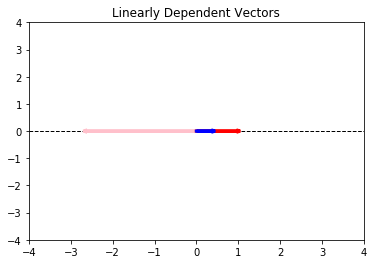

In [112]:
# Linearly Dependent

# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(-4,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(-2.65, v)
v3 = np.multiply(0.4,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='k', linewidth=1, zorder=0)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='pink')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')

plt.title("Linearly Dependent Vectors")
plt.show()




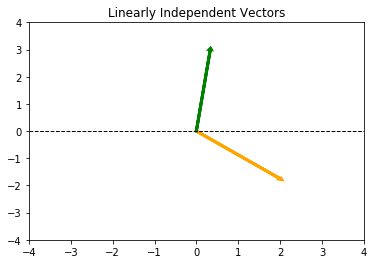

In [110]:
# Linearly Independent

# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(-4,4)

# Independent Vectors
v2 = [2,-1.75]
v3 = [1/3, 3]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='k', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Independent Vectors")
plt.show()




# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$ {span}_g = {span_h} = \begin{bmatrix} x & 2x \end{bmatrix} $

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

$
{span}_{l,m,n} = x\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + y\begin{bmatrix}  -1 \\ 0 \\ 7\end{bmatrix} + z\begin{bmatrix} 4 \\ 8 \\ 2 \end{bmatrix}
$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



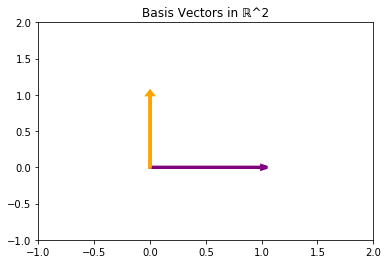

In [120]:
# Set Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]


# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.title("Basis Vectors in ℝ^2")
plt.show()

## 6.2 What does it mean to form a basis?

Forming a basis is a term used to describe linearly independent vectors which span a vector space V. The entire space V can be described by scaled combinations of the linearly independent vectors. The figure above depicts orthogonal basis vectors in $ℝ^2$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [125]:
P = np.array([[1 ,2, 3],[-1, 0, 7],[4, 8, 2]])
P



array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [127]:
print("Rank of P:",LA.matrix_rank(P))

Rank of P: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix describes the dimensionality of vector space spanned by the columns of the matrix. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)




$$\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}$$

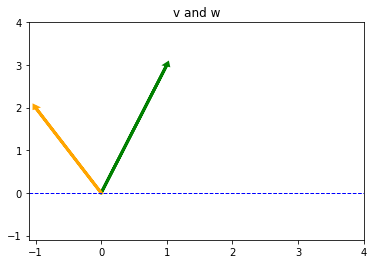

In [208]:
# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vectors
v = [1,3] 
w = [-1, 2]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')

plt.title("v and w")
plt.show()

In [146]:
projection_w = np.multiply(np.dot(w,v) / np.dot(v,v), v)
projection_w

array([0.5, 1.5])

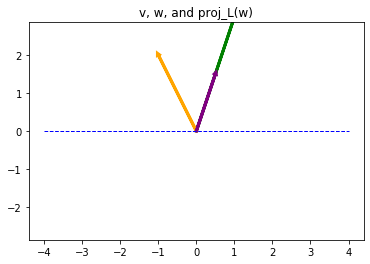

In [209]:
# Plot a line

# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(0,10)

# Original Vectors
v = [1,3] 
w = [-1, 2]

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals
plt.axis("equal")

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, projection_w[0], projection_w[1], linewidth=3, head_width=.05, head_length=0.05, color ='purple')


plt.title("v, w, and proj_L(w)")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 



In [0]:
def vector_projection_onto_y_eq_x(vector):
  v = [1,1]
  return np.multiply(np.dot(vector,v) / np.dot(v,v), v)



In [186]:
vector_projection_onto_y_eq_x([2, 6])

array([4., 4.])

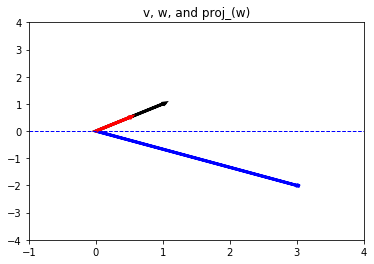

In [215]:
# Plot a line

# Axis Bounds
plt.xlim(-1,4)          
plt.ylim(-4,4)

# Original Vectors
v = [1,1] 
w = [3, -2]

# Get Vals for L
axes = plt.gca()
#plt.axis("equal")
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='black')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_projection_onto_y_eq_x(w)[0], vector_projection_onto_y_eq_x(w)[1], linewidth=3,  head_width=.05, head_length=0.05, color ='red')


plt.title("v, w, and proj_(w)")
plt.show()

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.